<a href="https://colab.research.google.com/github/avishek-astra/Deep_Learning_Experiments/blob/main/Convolution_convInCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
#convolution
from scipy.signal import convolve2d
#to read an image from a url
from imageio import imread

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


Manual 2D convolution in numpy/scipy

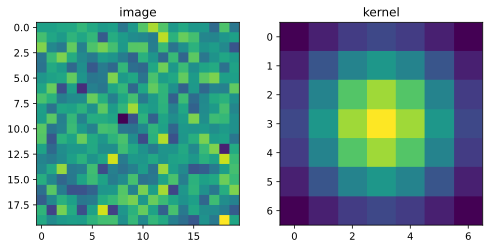

In [4]:
#image
imgN=20
image=np.random.randn(imgN,imgN)
#convolution kernel
kernelN=7
Y,X=np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
kernel=np.exp(-(X**2+Y**2)/7)


#let's see what they look like
fig,ax=plt.subplots(1,2,figsize=(8,6))
ax[0].imshow(image)
ax[0].set_title('image')
ax[1].imshow(kernel)
ax[1].set_title('kernel')
plt.show()



In [6]:
#now for the convolution
convoutput=np.zeros((imgN,imgN))
halfKr=kernelN//2
for rowi in range(halfKr,imgN-halfKr):
    for coli in range(halfKr,imgN-halfKr):
        # cut out a piece of the image
        pieceOfImg=image[rowi-halfKr:rowi+halfKr+1,:] #get the rows
        pieceOfImg=pieceOfImg[:,coli-halfKr:coli+halfKr+1] #get the columns
        #dot product: element-wise multiply and sum
        dotprod=np.sum(pieceOfImg*kernel[::-1,::-1])
        #store the result for this pixel
        convoutput[rowi,coli]=dotprod

In [7]:
#using scipy
convoutput2=convolve2d(image,kernel,mode='valid')


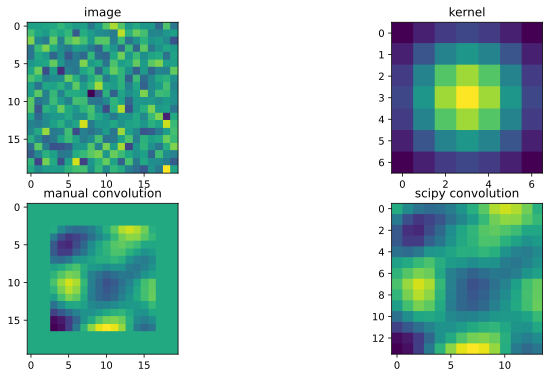

In [8]:
fig,ax=plt.subplots(2,2,figsize=(12,6))
ax[0,0].imshow(image)
ax[0,0].set_title('image')
ax[0,1].imshow(kernel)
ax[0,1].set_title('kernel')
ax[1,0].imshow(convoutput)
ax[1,0].set_title('manual convolution')
ax[1,1].imshow(convoutput2)
ax[1,1].set_title('scipy convolution')
plt.show()
#

  Examples of convolution with different kernels in a real image

(1521, 1188, 3)
(1521, 1188)


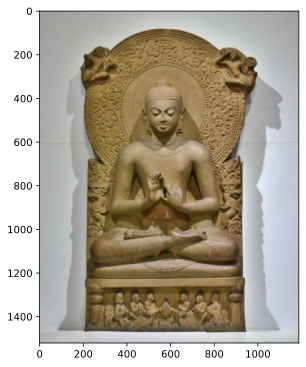

In [11]:
#read a pic form the web
buddha=imread("https://upload.wikimedia.org/wikipedia/commons/f/ff/Buddha_in_Sarnath_Museum_%28Dhammajak_Mutra%29.jpg")
#check the size
print(buddha.shape)
#let's see what the buddha looks like
fig=plt.figure(figsize=(10,6))
plt.imshow(buddha)
#transform image to 2D for convenience
buddha=np.mean(buddha,axis=2)
buddha=buddha/np.max(buddha)
#check the size again
print(buddha.shape)


In [12]:
#hand-craft two convolution kernels
# vertical kernel
VK = np.array([ [1,0,-1],
                [1,0,-1],
                [1,0,-1] ])

# horizontal kernel
HK = np.array([ [ 1, 1, 1],
                [ 0, 0, 0],
                [-1,-1,-1] ])


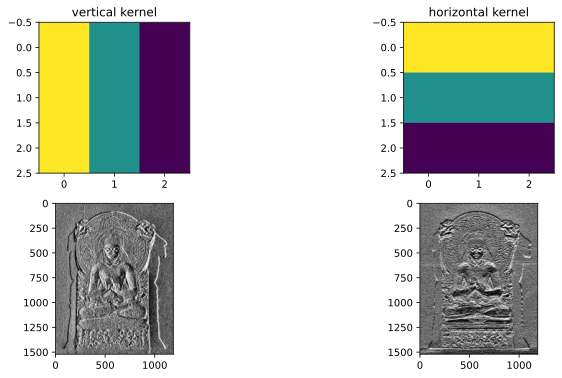

In [15]:
fig,ax=plt.subplots(2,2,figsize=(12,6))
ax[0,0].imshow(VK)
ax[0,0].set_title('vertical kernel')
ax[0,1].imshow(HK)
ax[0,1].set_title('horizontal kernel')

#run convolution and show the resut
convres=convolve2d(buddha,VK,mode='same')
ax[1,0].imshow(convres,cmap='gray',vmin=0,vmax=.01)

convres=convolve2d(buddha,HK,mode='same')
ax[1,1].imshow(convres,cmap='gray',vmin=0,vmax=.01)

plt.show()

Now in Pytorch

In [16]:
#first, translate everything into a tensor
import torch
import torch.nn.functional as F

VK_t=torch.tensor(VK).view(1,1,3,3).double()
HK_t=torch.tensor(HK).view(1,1,3,3).double()
buddha_t=torch.tensor(buddha).view(1,1,buddha.shape[0],buddha.shape[1])

print(VK_t.shape)
print(buddha_t.shape)

torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 1521, 1188])


In [17]:
C=F.conv2d(buddha_t,VK_t)
print(C.shape)

torch.Size([1, 1, 1519, 1186])


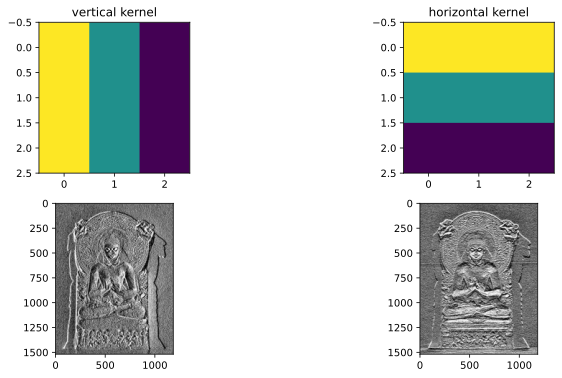

In [18]:
fig,ax=plt.subplots(2,2,figsize=(12,6))
ax[0,0].imshow(VK)
ax[0,0].set_title('vertical kernel')
ax[0,1].imshow(HK)
ax[0,1].set_title('horizontal kernel')
#run convoltion and show the result
convres=F.conv2d(buddha_t,VK_t)
img=torch.squeeze(convres).detach().numpy()
ax[1,0].imshow(img,cmap='gray',vmin=0,vmax=.01)

convres=F.conv2d(buddha_t,HK_t)
img=torch.squeeze(convres).detach().numpy()
ax[1,1].imshow(img,cmap='gray',vmin=0,vmax=.01)

plt.show()
#